In [1]:
import pandas as pd
from transformers import pipeline
import tqdm
tqdm.tqdm.pandas()

In [2]:
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("T'estimo!")

[{'label': 'Positive', 'score': 0.6600587964057922}]

In [37]:
tweets = pd.read_json("tweets_new_flat.json", lines=True)
tweets["text"] = tweets["text"].str.replace(r"http\S+", "")
tweets.head()

/tmp/ipykernel_2047/3060748725.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets["text"] = tweets["text"].str.replace(r"http\S+", "")


,referenced_tweets,reply_settings,context_annotations,lang,conversation_id,author_id,created_at,public_metrics,entities,possibly_sensitive,in_reply_to_user_id,source,text,id,author,in_reply_to_user,__twarc,attachments,geo
0,"[{'type': 'replied_to', 'id': '131447772937129...",everyone,"[{'domain': {'id': '10', 'name': 'Person', 'de...",en,1314477726678614016,1194759472087998464,2020-10-09 09:08:54+00:00,"{'retweet_count': 8, 'reply_count': 3, 'like_c...","{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,470801601.0,Twitter for Android,@AlyAShields @BetsiCadwaladr @healthdpt @NICEC...,1314493025700077568,"{'created_at': '2019-11-13T23:30:55.000Z', 'id...","{'created_at': '2012-01-22T05:07:46.000Z', 'id...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN
1,NaN,everyone,NaN,en,1277997708649865216,1194759472087998464,2020-06-30 16:09:32+00:00,"{'retweet_count': 3, 'reply_count': 5, 'like_c...","{'mentions': [{'start': 61, 'end': 72, 'userna...",False,NaN,Twitter Web App,Delighted to hear that an agreement has been r...,1277997708649865216,"{'created_at': '2019-11-13T23:30:55.000Z', 'id...",NaN,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN
2,"[{'type': 'retweeted', 'id': '1503115750009094...",everyone,"[{'domain': {'id': '123', 'name': 'Ongoing New...",en,1503311023444475904,1193173567313240064,2022-03-14 10:04:12+00:00,"{'retweet_count': 2503, 'reply_count': 0, 'lik...","{'annotations': [{'start': 100, 'end': 101, 'p...",False,NaN,Twitter Web App,RT @sajidjavid: I can confirm that 21 very ill...,1503311023444475904,"{'url': 'https://t.co/fgMQ8bqcXL', 'id': '1193...",NaN,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN
3,NaN,everyone,"[{'domain': {'id': '88', 'name': 'Political Bo...",en,1450418944129519616,1189861431048622080,2021-10-19 11:09:58+00:00,"{'retweet_count': 1, 'reply_count': 1, 'like_c...","{'mentions': [{'start': 59, 'end': 73, 'userna...",False,NaN,Twitter Web App,In today's session of the Health and Social Ca...,1450418944129519616,{'profile_image_url': 'https://pbs.twimg.com/p...,NaN,{'url': 'https://api.twitter.com/2/tweets/sear...,"{'media_keys': ['7_1450418757801844739'], 'med...",NaN
4,NaN,everyone,"[{'domain': {'id': '123', 'name': 'Ongoing New...",en,1391840953758109696,1189861431048622080,2021-05-10 19:41:57+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 127, 'end': 138, 'user...",False,NaN,Twitter for iPhone,A number of rule changes will take place from ...,1391840953758109696,{'profile_image_url': 'https://pbs.twimg.com/p...,NaN,{'url': 'https://api.twitter.com/2/tweets/sear...,"{'media_keys': ['7_1391840904621797377'], 'med...",NaN


In [4]:
def get_sentiment(x):
    return sentiment_task(x)[0]['label']

tweets["sentiment"] = tweets["text"].progress_map(get_sentiment)

100%|███████████████████████████████████████████████████████████████████████████████| 2232/2232 [07:26<00:00,  5.00it/s]


In [5]:
tweets = tweets.set_index("id")
tweets["sentiment"].to_csv("tweet_sentiment.csv")

In [6]:
tweets["sentiment"].value_counts()

Neutral     1007
Positive     947
Negative     278
Name: sentiment, dtype: int64

In [7]:
# def split_label(x):
#     print(x)
#     if x <= "2020-01-01 00:00:00+00:00":
#         return "before"
#     elif x > "2020-01-01 00:00:00+00:00" and x < "2020-01-01 00:00:00+00:00":
#         return "first_wave"
#     elif x >= "2020-09-01 00:00:00+00:00":
#         return "after_first"

tweets["split"] = "after_first"
tweets.loc[(tweets["created_at"] < "2020-09-01 00:00:00+00:00"), "split"] = "first_wave"
tweets.loc[(tweets["created_at"] < "2020-01-01 00:00:00+00:00"), "split"] = "before"
# tweets["split"] = "N/A"
# tweets["split"] = tweets["created_at"] <= "2020-01-01 00:00:00+00:00"
# tweets["split"] = tweets["created_at"].map(split_label)
tweets["split"].value_counts()

after_first    1402
first_wave      753
before           77
Name: split, dtype: int64

<AxesSubplot:xlabel='split', ylabel='count'>

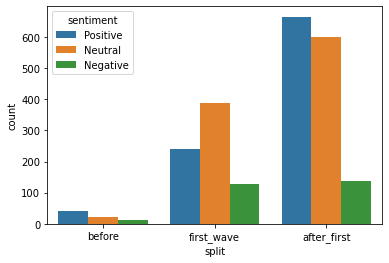

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=tweets, x="split", hue="sentiment", order=["before", "first_wave", "after_first"])

In [9]:
tweets.groupby("split")["sentiment"].value_counts(normalize=True)

split        sentiment
after_first  Positive     0.474322
             Neutral      0.427247
             Negative     0.098431
before       Positive     0.558442
             Neutral      0.272727
             Negative     0.168831
first_wave   Neutral      0.513944
             Positive     0.317397
             Negative     0.168659
Name: sentiment, dtype: float64

In [10]:
reshaped = tweets.groupby("split")["sentiment"].value_counts(normalize=True).rename("percent").reset_index()
reshaped

,split,sentiment,percent
0,after_first,Positive,0.474322
1,after_first,Neutral,0.427247
2,after_first,Negative,0.098431
3,before,Positive,0.558442
4,before,Neutral,0.272727
5,before,Negative,0.168831
6,first_wave,Neutral,0.513944
7,first_wave,Positive,0.317397
8,first_wave,Negative,0.168659


<AxesSubplot:xlabel='split', ylabel='percent'>

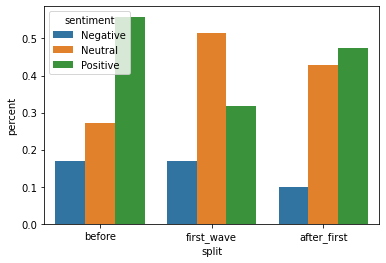

In [11]:
sns.barplot(data=reshaped, x="split", y="percent", hue="sentiment", 
            order=["before", "first_wave", "after_first"], 
            hue_order=["Negative", "Neutral", "Positive"])

<AxesSubplot:xlabel='split', ylabel='percent'>

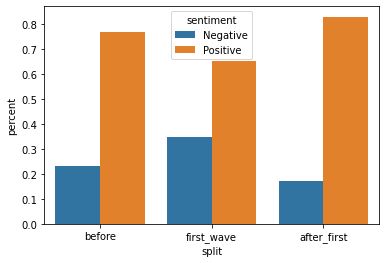

In [12]:
no_neutral = tweets[tweets["sentiment"] != "Neutral"]
reshaped_no_neutral = no_neutral.groupby("split")["sentiment"].value_counts(normalize=True).rename("percent").reset_index()
sns.barplot(data=reshaped_no_neutral, x="split", y="percent", hue="sentiment", 
            order=["before", "first_wave", "after_first"], 
            hue_order=["Negative", "Positive"])

In [34]:
grouped = tweets.set_index("created_at").sort_index().groupby("sentiment").rolling("30D").count().div(30)["text"]
grouped#.plot()

sentiment  created_at               
Negative   2019-10-10 13:07:29+00:00    0.033333
           2019-10-10 13:38:36+00:00    0.066667
           2019-10-10 20:52:40+00:00    0.100000
           2019-10-17 09:08:09+00:00    0.133333
           2019-10-17 21:09:22+00:00    0.166667
                                          ...   
Positive   2022-07-12 14:11:06+00:00    0.500000
           2022-07-12 17:05:46+00:00    0.533333
           2022-07-15 15:20:25+00:00    0.500000
           2022-07-16 22:41:14+00:00    0.466667
           2022-07-19 13:49:46+00:00    0.500000
Name: text, Length: 2232, dtype: float64

<AxesSubplot:xlabel='created_at'>

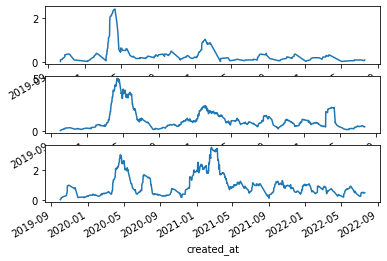

In [36]:
f, a = plt.subplots(3,1)
grouped.xs('Negative').plot(ax=a[0])
grouped.xs('Neutral').plot(ax=a[1])
grouped.xs('Positive').plot(ax=a[2])